4.10: Coding Etiquette & Excel Reporting

Table of Contents
1.Import dataset with most up to date project data
2.Address PII	
3.Regional segmentation	
4.Compare spending by region	
5.Exclude low-activity customers (<5 orders)
6.Customer profiling (age, income, goods, dependents)	
7.Distribution of profiles (visualization)
8.Aggregate min, mean, max on profile level	
9.Compare profiles with regions/departments	
10.Export charts	
11.Export final dataset and tidy notebook

Import dataset with most up to date project data

In [4]:
#importing libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [5]:
# Creating Path
path = r'C:\Users\henry\OneDrive\042025Instacart Basket Analysis'

In [6]:
# importing most up-to-date project data 
df = pd.read_pickle(os.path.join(path, '02 DATA', 'Prepared Data', 'orders_products_customers_aggregated.pkl'))

Address PII

In [8]:
# Droping PII (first and last name)
df.drop(columns=['first_name', 'last_name'], inplace=True)

In [9]:
# check output
df.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_dow,order_hour_of_day,...,spender_flag,Customer_frequency,frequency_flag,gender,state,age,date_joined,n_dependants,marital_status,income
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Low_spender,8.0,Frequent Customer,Male,Minnesota,81,8/1/2019,1,married,49620
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Low_spender,8.0,Frequent Customer,Male,Minnesota,81,8/1/2019,1,married,49620
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,Low_spender,8.0,Frequent Customer,Female,Vermont,66,6/16/2018,2,married,158302
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,...,Low_spender,9.0,Frequent Customer,Female,Wisconsin,40,2/9/2020,3,married,31308
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,...,Low_spender,9.0,Frequent Customer,Female,Wisconsin,40,2/9/2020,3,married,31308


Regional segmentation

In [11]:
# Create region column from 'state'
northeast = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'New Jersey', 'Pennsylvania']
midwest = ['Ohio', 'Michigan', 'Indiana', 'Wisconsin', 'Illinois', 'Minnesota', 'Iowa', 'Missouri', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas']
south = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']
west = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']


In [12]:
def assign_region(state):
    if state in northeast:
        return 'Northeast'
    elif state in midwest:
        return 'Midwest'
    elif state in south:
        return 'South'
    elif state in west:
        return 'West'
    else:
        return 'Other'

df['region'] = df['state'].apply(assign_region)

Compare spending by region	

In [14]:
# Create spending flag
df['spending_flag'] = df['prices'].apply(lambda x: 'High spender' if x >= 10 else 'Low spender')

In [15]:
# Step 4: Crosstab - Region vs. Spending Flag
crosstab_region_spending = pd.crosstab(df['region'], df['spending_flag'], values=df['prices'], aggfunc='mean').fillna(0)
print(crosstab_region_spending)

spending_flag  High spender  Low spender
region                                  
Midwest           12.770250     5.356816
Northeast         12.772846     5.351339
South             12.772163     5.356667
West              12.772541     5.356993


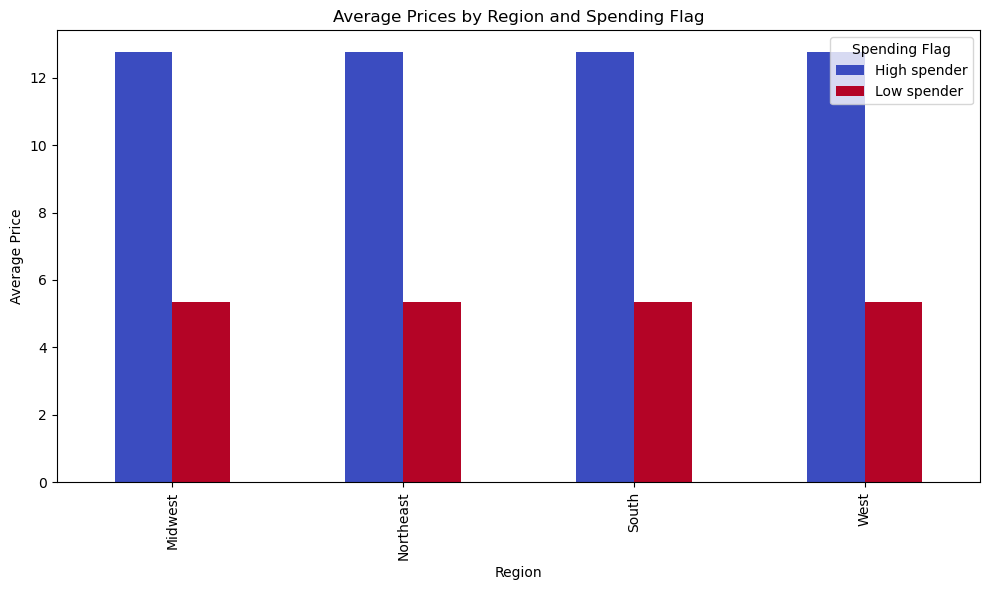

In [16]:
# Visualization - Bar Chart
crosstab_region_spending.plot(kind='bar', figsize=(10, 6), colormap='coolwarm')
plt.title('Average Prices by Region and Spending Flag')
plt.ylabel('Average Price')
plt.xlabel('Region')
plt.legend(title='Spending Flag')
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'region_spending_bar_chart.png'))
plt.show()


Exclude low-activity customers (<5 orders)

In [18]:
#Create exclusion flag and filter active customers
df['exclusion_flag'] = df['order_number'] < 5
df_active = df[df['exclusion_flag'] == False]


In [19]:
# Export active customers
df_active.to_csv(os.path.join(path, '02 DATA', 'Prepared Data', 'active_customers.csv'), index=False)


Customer profiling (age, income, goods, dependents)	

In [21]:
# Create customer profile
def customer_profile(row):
    if row['age'] < 30 and row['n_dependants'] == 0:
        return 'Young Single'
    elif row['age'] < 40 and row['n_dependants'] >= 1:
        return 'Young Parent'
    elif 40 <= row['age'] <= 60 and row['n_dependants'] >= 2:
        return 'Middle-aged Family'
    elif row['age'] > 60 and row['n_dependants'] == 0:
        return 'Senior Solo'
    else:
        return 'Other'

df_active['profile'] = df_active.apply(customer_profile, axis=1)


C:\Users\henry\AppData\Local\Temp\ipykernel_2232\2544668854.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_active['profile'] = df_active.apply(customer_profile, axis=1)


In [22]:
df_active

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_dow,order_hour_of_day,...,state,age,date_joined,n_dependants,marital_status,income,region,spending_flag,exclusion_flag,profile
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Minnesota,81,8/1/2019,1,married,49620,Midwest,Low spender,False,Other
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Minnesota,81,8/1/2019,1,married,49620,Midwest,Low spender,False,Other
5,1,Chocolate Sandwich Cookies,61,19,5.8,1701441,777,16,1,7,...,Hawaii,51,1/4/2019,2,married,57797,West,Low spender,False,Middle-aged Family
7,1,Chocolate Sandwich Cookies,61,19,5.8,1290456,910,12,3,10,...,Tennessee,65,7/25/2019,0,divorced/widowed,44856,South,Low spender,False,Senior Solo
8,1,Chocolate Sandwich Cookies,61,19,5.8,369558,1052,10,1,20,...,Oregon,72,3/30/2018,1,married,153843,West,Low spender,False,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32399725,49688,Fresh Foaming Cleanser,73,11,13.5,3166828,188073,7,1,15,...,Minnesota,20,1/23/2018,2,living with parents and siblings,27577,Midwest,High spender,False,Young Parent
32399726,49688,Fresh Foaming Cleanser,73,11,13.5,3106363,197371,10,4,14,...,Alabama,62,10/25/2019,1,married,128072,South,High spender,False,Other
32399729,49688,Fresh Foaming Cleanser,73,11,13.5,809510,200873,5,3,8,...,Michigan,57,3/21/2018,1,married,100649,Midwest,High spender,False,Other
32399730,49688,Fresh Foaming Cleanser,73,11,13.5,2359893,200873,9,3,15,...,Michigan,57,3/21/2018,1,married,100649,Midwest,High spender,False,Other


C:\Users\henry\AppData\Local\Temp\ipykernel_2232\2866802721.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=profile_counts, x='Profile', y='Count', palette='muted')


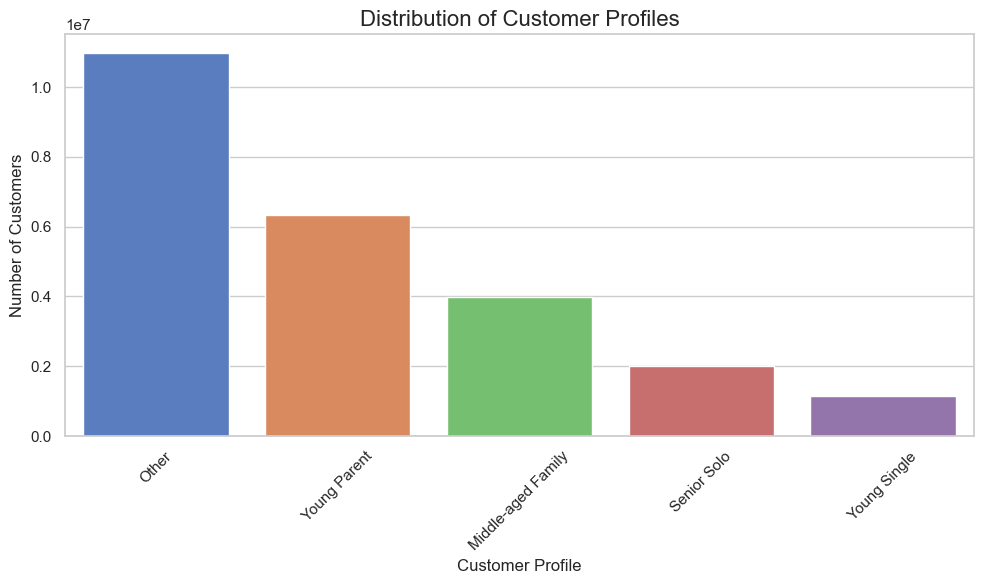

In [23]:
# Visualization to show the distribution of profiles
sns.set(style='whitegrid')
# Count the number of customers per profile
profile_counts = df_active['profile'].value_counts().reset_index()
profile_counts.columns = ['Profile', 'Count']

# Create a barplot
plt.figure(figsize=(10, 6))
sns.barplot(data=profile_counts, x='Profile', y='Count', palette='muted')

# Add titles and labels
plt.title('Distribution of Customer Profiles', fontsize=16)
plt.xlabel('Customer Profile', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Distribution_of_Customer_Profiles_barplot.png'))
plt.show()

In [24]:
profile_counts

,Profile,Count
0,Other,10966597
1,Young Parent,6326031
2,Middle-aged Family,3980187
3,Senior Solo,2000467
4,Young Single,1137884


Most customers are either young parents or don’t fit a specific profile, while young singles and seniors living alone make up much smaller groups

Distribution of Profiles-Customer Profile vs Age Group 

In [27]:
 # Crosstab for Profile vs Age Group ---
df_active['age_group'] = pd.cut(df_active['age'], bins=[0, 30, 40, 60, 100], labels=['<30', '30-40', '40-60', '60+'])
age_ct = pd.crosstab(df_active['profile'], df_active['age_group'], normalize='index') * 100

C:\Users\henry\AppData\Local\Temp\ipykernel_2232\3123322735.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_active['age_group'] = pd.cut(df_active['age'], bins=[0, 30, 40, 60, 100], labels=['<30', '30-40', '40-60', '60+'])


In [28]:
age_ct

age_group,<30,30-40,40-60,60+
profile,,,,
Middle-aged Family,0.000000,4.741988,95.258012,0.000000
Other,0.891981,9.554933,35.140773,54.412312
Senior Solo,0.000000,0.000000,0.000000,100.000000
Young Parent,59.028813,40.971187,0.000000,0.000000
Young Single,100.000000,0.000000,0.000000,0.000000


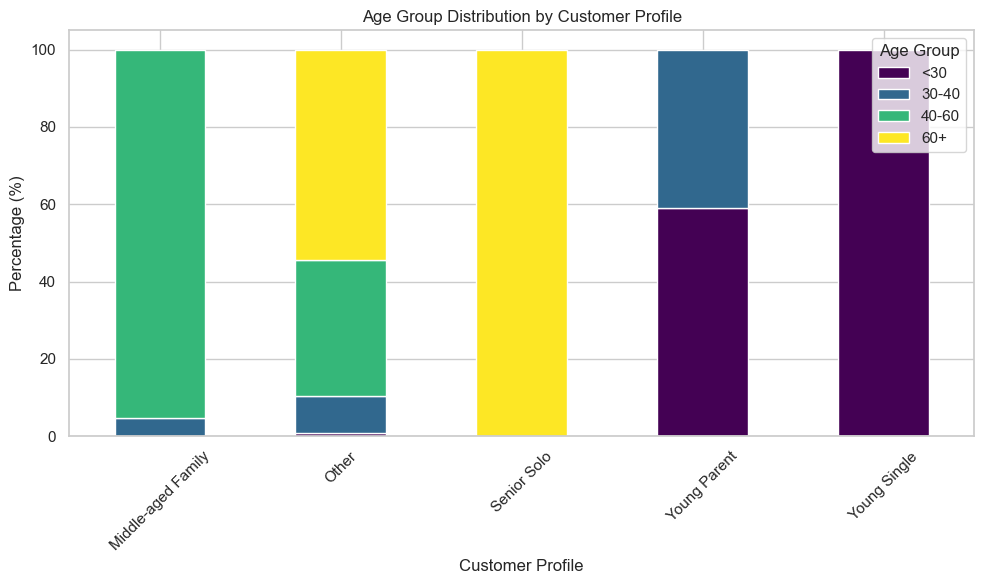

In [29]:
# Plot the age distribution across profiles
age_ct.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

plt.title('Age Group Distribution by Customer Profile')
plt.xlabel('Customer Profile')
plt.ylabel('Percentage (%)')
plt.legend(title='Age Group')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_group_distribution_by_profile.png'))
plt.show()

This chart helps us understand the age makeup of each customer group. For example, if we want to target Young Singles, we know they’re all under 30. If we’re planning products for Middle-aged Families, they’re mostly between 40 and 60. Senior Solos? They're entirely 60+.”

This helps you target marketing campaigns, customize promotions, or adjust product recommendations by knowing who’s in each profile.

In [31]:
df_active['income_group'] = pd.cut(df_active['income'], bins=[0, 40000, 80000, 120000, 200000], labels=['Low', 'Mid', 'High', 'Very High'])
income_crosstab = pd.crosstab(df_active['profile'], df_active['income_group'], normalize='index') * 100

C:\Users\henry\AppData\Local\Temp\ipykernel_2232\4000888098.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_active['income_group'] = pd.cut(df_active['income'], bins=[0, 40000, 80000, 120000, 200000], labels=['Low', 'Mid', 'High', 'Very High'])


In [32]:
income_crosstab

income_group,Low,Mid,High,Very High
profile,,,,
Middle-aged Family,4.277598,15.459937,37.399069,42.863396
Other,4.393822,18.042467,37.115687,40.448023
Senior Solo,4.159479,12.424370,38.099616,45.316535
Young Parent,6.853268,61.586707,30.611390,0.948636
Young Single,7.096556,61.293321,31.035603,0.574521


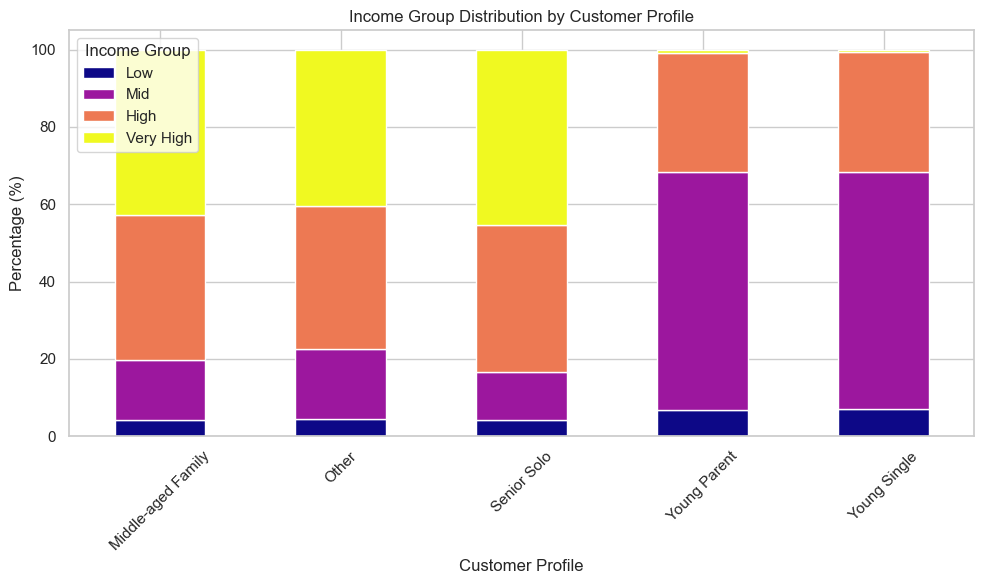

In [33]:
# Visualize Profile vs Income Group
income_crosstab.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='plasma')

plt.title('Income Group Distribution by Customer Profile')
plt.xlabel('Customer Profile')
plt.ylabel('Percentage (%)')
plt.legend(title='Income Group')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_group_distribution_by_profile.png'))
plt.show()


If we want to market premium products (like gourmet meats or wine), we should target Middle-aged Families or Senior Solos.
But if we’re selling budget-friendly staples (like canned goods or pasta), we’ll do better reaching out to Young Singles and Young Parents

Customer Proflie vs Number of Dependants

In [36]:
# Number of Dependants: Indicates family status, useful for identifying parents or single individuals
n_dep_ct = pd.crosstab(df_active['profile'], df_active['n_dependants'], normalize='index') * 100

In [37]:
n_dep_ct

n_dependants,0,1,2,3
profile,,,,
Middle-aged Family,0.000000,0.000000,49.062192,50.937808
Other,27.043567,36.270340,18.566142,18.119951
Senior Solo,100.000000,0.000000,0.000000,0.000000
Young Parent,0.000000,33.253188,33.265044,33.481768
Young Single,100.000000,0.000000,0.000000,0.000000


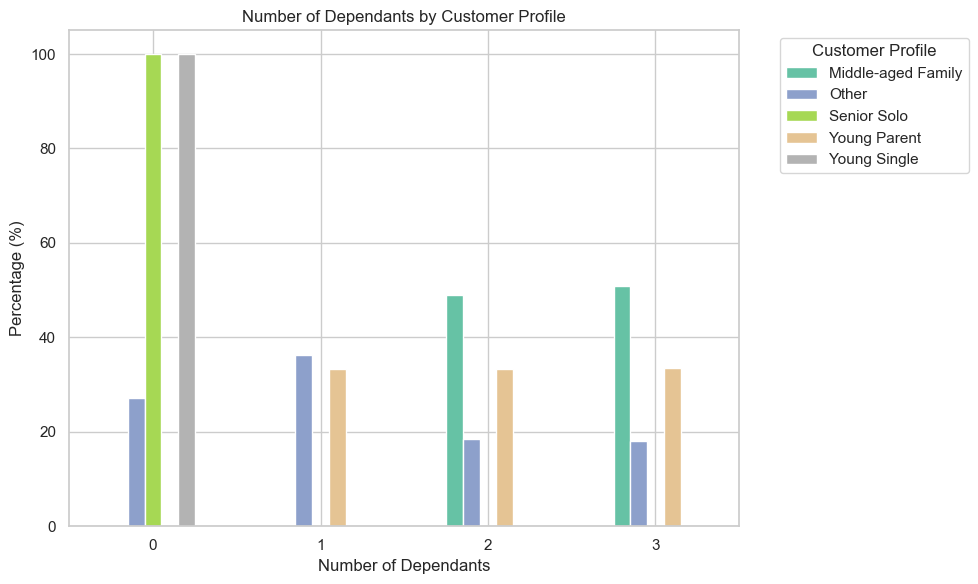

In [38]:
# Transpose for grouped bar chart format
n_dep_ct.T.plot(kind='bar', figsize=(10, 6), colormap='Set2')

plt.title('Number of Dependants by Customer Profile')
plt.xlabel('Number of Dependants')
plt.ylabel('Percentage (%)')
plt.legend(title='Customer Profile', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'dependants_by_profile.png'))
plt.show()

Customer profile vs Departments

In [40]:
# Profile vs Departments: Reveals what types of products different groups buy.
# Parents buy from 'babies', singles go for 'snacks' or 'frozen', high earners like 'alcohol' or 'meat'.
# Example: make sure department names are mapped to IDs if you only have department_id numbers
department_map = {
    1: 'frozen', 2: 'other', 3: 'bakery', 4: 'produce', 5: 'alcohol', 6: 'international',
    7: 'beverages', 8: 'pets', 9: 'dry goods pasta', 10: 'bulk', 11: 'personal care',
    12: 'meat seafood', 13: 'pantry', 14: 'breakfast', 15: 'canned goods', 16: 'dairy eggs',
    17: 'household', 18: 'babies', 19: 'snacks', 20: 'deli', 21: 'missing'
}
df_active['department_id'] = df_active['department_id'].map(department_map)
dept_ct = pd.crosstab(df_active['profile'], df_active['department_id'], normalize='index') * 100

C:\Users\henry\AppData\Local\Temp\ipykernel_2232\1450116003.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_active['department_id'] = df_active['department_id'].map(department_map)


In [41]:
dept_ct

department_id,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
profile,,,,,,,,,,,,,,,,,,,,,
Middle-aged Family,0.428397,1.435058,3.629955,8.404655,2.148341,0.111000,3.239169,16.699190,3.210075,2.615154,...,2.234945,0.820263,2.164044,0.234738,0.111402,5.696441,1.390387,0.311518,29.508337,8.892874
Other,0.440219,1.362711,3.621771,8.406792,2.141840,0.114420,3.232963,16.856241,3.198877,2.579150,...,2.214616,0.803704,2.143363,0.238132,0.110745,5.677003,1.337461,0.289361,29.645340,8.934111
Senior Solo,0.430849,1.339387,3.616705,8.403038,2.125504,0.105275,3.139517,16.886207,3.260939,2.593494,...,2.165194,0.809461,2.133552,0.215700,0.109424,5.658979,1.351135,0.306728,29.581493,8.970305
Young Parent,0.463403,1.360316,3.611222,8.165594,2.174713,0.114606,3.235077,16.986211,3.203826,2.607037,...,2.197270,0.811330,2.149357,0.236736,0.112108,5.662792,1.325634,0.290546,29.587873,9.035618
Young Single,0.413926,1.453399,3.591579,8.377743,2.149340,0.108623,3.239522,16.803646,3.210081,2.635418,...,2.215692,0.843232,2.113836,0.247653,0.114774,5.680368,1.368944,0.304337,29.705401,8.995293


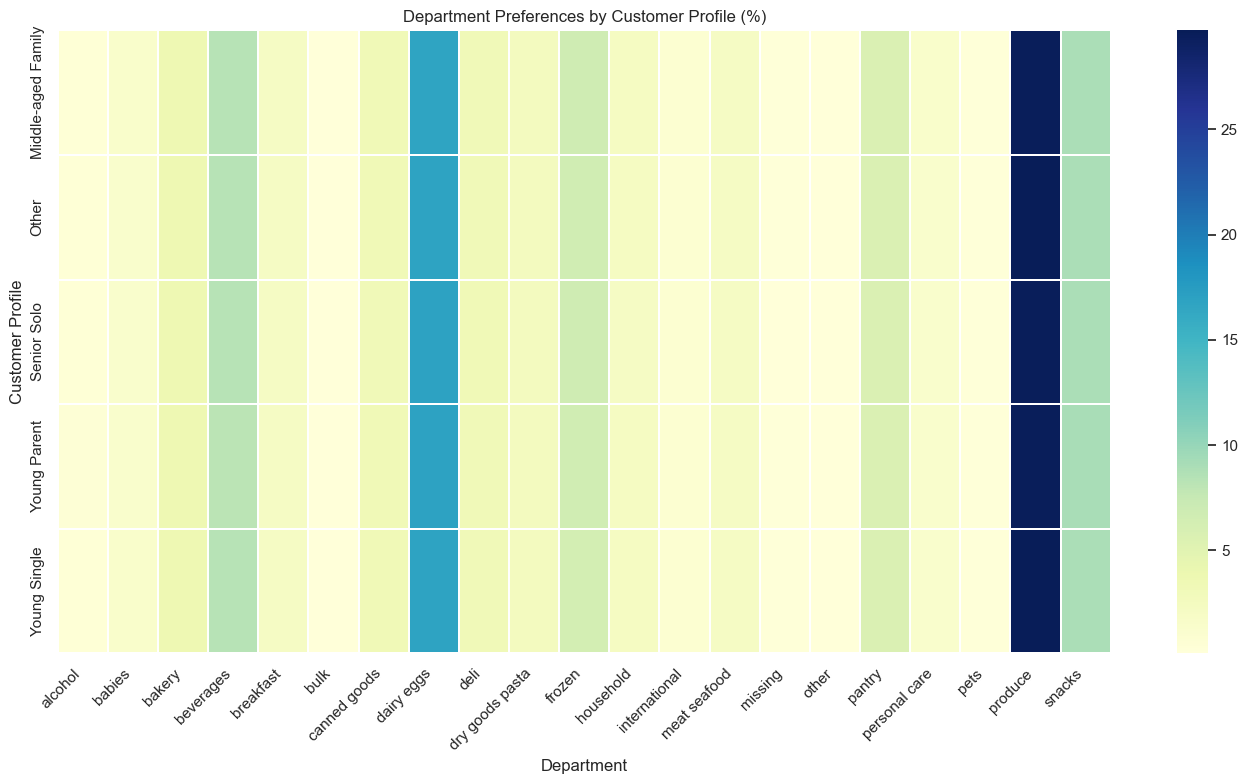

In [42]:
plt.figure(figsize=(14, 8))
sns.heatmap(dept_ct, cmap="YlGnBu", linewidths=0.3)

plt.title("Department Preferences by Customer Profile (%)")
plt.xlabel("Department")
plt.ylabel("Customer Profile")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'department_preferences_by_profile.png'))
plt.show()


All profiles buy a lot of produce — it's the most popular department.

Young Singles and Young Parents buy slightly more from snacks, beverages, and babies — which fits their convenience-focused lifestyle.

Senior Solos and Middle-aged Families lean more into household, personal care, and pantry — hinting at structured routines and home management.

Premium departments like alcohol and meat seafood have similar interest across all profiles, but still slightly more for Middle-aged Families.

Customer Profile vs Hour of Day

In [45]:
#Crosstab for Profile vs Hour of Day 
hour_crosstab = pd.crosstab(df_active['profile'], df_active['order_hour_of_day'], normalize='index') * 100

In [46]:
hour_crosstab

order_hour_of_day,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
profile,,,,,,,,,,,,,,,,,,,,,
Middle-aged Family,0.658210,0.344959,0.196649,0.151551,0.147606,0.274585,0.907721,2.863961,5.580090,7.820989,...,8.247125,8.071832,7.638737,6.308874,4.913613,3.806379,2.997673,2.507420,1.898102,1.213134
Other,0.659494,0.339723,0.195895,0.151961,0.169405,0.276604,0.927817,2.890240,5.573579,7.845943,...,8.244791,8.127635,7.698550,6.304080,4.939600,3.760127,2.957362,2.457098,1.955657,1.245902
Senior Solo,0.605909,0.316526,0.215600,0.164662,0.146516,0.289882,0.920335,3.002499,5.470723,7.705151,...,8.246374,8.197886,7.787032,6.212699,4.785283,3.847502,3.029393,2.462525,1.979138,1.227363
Young Parent,0.666706,0.354377,0.221671,0.153556,0.165238,0.277536,0.943941,2.842525,5.453672,7.795188,...,8.318486,8.161484,7.689814,6.232360,4.837314,3.721196,2.960450,2.449972,1.983392,1.214521
Young Single,0.676343,0.316728,0.207930,0.138942,0.159594,0.292121,1.049404,2.976753,5.438428,7.888765,...,8.291003,8.335472,7.833751,6.377188,4.699073,3.765410,2.931582,2.442340,1.923658,1.226311


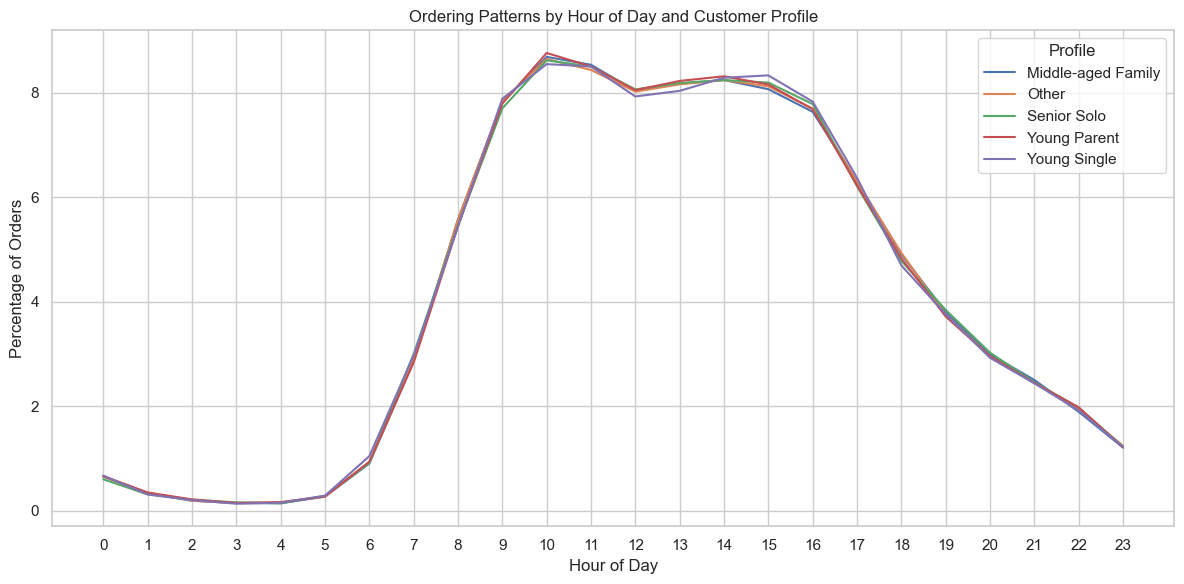

In [47]:
# Transpose the DataFrame so hours (0–23) are on the x-axis
hour_crosstab_transposed = hour_crosstab.T

# Plot each profile as a line
plt.figure(figsize=(12, 6))
for profile in hour_crosstab_transposed.columns:
    plt.plot(hour_crosstab_transposed.index, hour_crosstab_transposed[profile], label=profile)

plt.title('Ordering Patterns by Hour of Day and Customer Profile')
plt.xlabel('Hour of Day')
plt.ylabel('Percentage of Orders')
plt.xticks(range(0, 24))
plt.grid(True)
plt.legend(title='Profile')
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hourly_orders_by_profile.png'))
plt.show()

This chart shows what time of day each customer type is most likely to shop.
Young Singles and Parents tend to shop later in the morning and early afternoon,
while Senior Solos and Middle-aged Families show steady activity earlier in the day

Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure

In [50]:
# First, calculate total expenditure per customer (sum of prices)
customer_spending = df_active.groupby(['user_id', 'profile']).agg(
    order_count=('order_number', 'max'),  # usage frequency
    total_spent=('prices', 'sum')         # total money spent
).reset_index()

# Then, aggregate max, mean, and min at the profile level
profile_summary = customer_spending.groupby('profile').agg(
    max_orders=('order_count', 'max'),
    mean_orders=('order_count', 'mean'),
    min_orders=('order_count', 'min'),
    
    max_spent=('total_spent', 'max'),
    mean_spent=('total_spent', 'mean'),
    min_spent=('total_spent', 'min')
).round(2).reset_index()

print(profile_summary)


              profile  max_orders  mean_orders  min_orders  max_spent  \
0  Middle-aged Family          99        18.79           5    20323.5   
1               Other          99        18.84           5    24563.5   
2         Senior Solo          99        18.90           5    23557.9   
3        Young Parent          99        18.91           5    21864.5   
4        Young Single          99        18.58           5    17692.6   

   mean_spent  min_spent  
0     1164.08        1.0  
1     1162.61        1.0  
2     1181.11        1.3  
3     1184.90        1.2  
4     1148.71        1.1  


Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

In [52]:
# Percentage of each profile within each region
profile_region_ct = pd.crosstab(df_active['region'], df_active['profile'], normalize='index') * 100
print(profile_region_ct)


profile    Middle-aged Family      Other  Senior Solo  Young Parent  \
region                                                                
Midwest             16.144895  45.367231     8.199137     25.741053   
Northeast           16.718725  44.244780     8.464075     25.755357   
South               16.183958  44.576018     8.151128     26.313436   
West                16.322206  45.441781     8.062236     25.664360   

profile    Young Single  
region                   
Midwest        4.547685  
Northeast      4.817063  
South          4.775460  
West           4.509417  


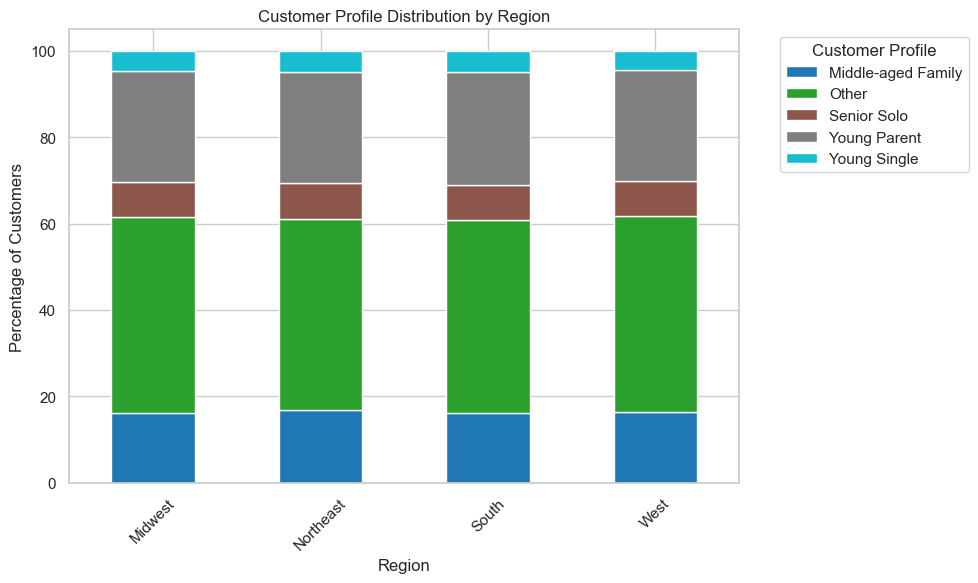

In [53]:
# Plot the crosstab as a stacked bar chart
profile_region_ct.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab10')

plt.title('Customer Profile Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Percentage of Customers')
plt.legend(title='Customer Profile', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'profile_distribution_by_region.png'))
plt.show()

This chart shows what types of customers are most common in each region. For example, the West might have more Young Singles, while the South has more Middle-aged Families. That helps us target the right products and promotions for each region.

In [55]:
# Create a grouped summary
dept_profile_region = df_active.groupby(['region', 'profile', 'department_id']).size().reset_index(name='count')

# Optional: normalize by region-profile group for relative comparison
dept_profile_region['percent'] = dept_profile_region.groupby(['region', 'profile'])['count'].transform(lambda x: x / x.sum() * 100)

# Example: pivot for easy comparison
dept_pivot = dept_profile_region.pivot_table(
    index=['region', 'profile'],
    columns='department_id',
    values='percent'
).fillna(0)


In [56]:
dept_pivot

department_id                  alcohol    babies    bakery  beverages  \
region    profile                                                       
Midwest   Middle-aged Family  0.408784  1.358240  3.727215   8.352693   
          Other               0.433182  1.335402  3.599889   8.317026   
          Senior Solo         0.513630  1.402925  3.593914   8.068154   
          Young Parent        0.465300  1.424131  3.501723   8.189078   
          Young Single        0.512112  1.490514  3.634067   8.313921   
Northeast Middle-aged Family  0.403959  1.394172  3.628701   8.796163   
          Other               0.448502  1.349173  3.711848   8.603987   
          Senior Solo         0.314624  1.283687  3.620228   8.412149   
          Young Parent        0.431491  1.416768  3.588173   8.261778   
          Young Single        0.535987  1.592564  3.610452   8.483889   
South     Middle-aged Family  0.398891  1.525015  3.517569   8.366828   
          Other               0.451858  1.401750  3.613538   8.451351   
          Senior Solo         0.457807  1.331158  3.612647   8.607922   
          Young Parent        0.487820  1.326741  3.642027   8.170154   
          Young Single        0.301181  1.527803  3.544091   8.393385   
West      Middle-aged Family  0.501357  1.417427  3.687778   8.223781   
          Other               0.426240  1.346941  3.591725   8.299425   
          Senior Solo         0.402753  1.331544  3.640638   8.438201   
          Young Parent        0.451231  1.307555  3.686371   8.071475   
          Young Single        0.388738  1.214408  3.603891   8.336788   

department_id                 breakfast      bulk  canned goods  dairy eggs  \
region    profile                                                             
Midwest   Middle-aged Family   2.172880  0.112798      3.313550   16.748228   
          Other                2.124917  0.114905      3.224334   16.762891   
          Senior Solo          2.142509  0.111696      3.062772   16.909208   
          Young Parent         2.125619  0.116325      3.225264   16.951550   
          Young Single         2.077325  0.091641      3.216292   17.040996   
Northeast Middle-aged Family   2.044194  0.088860      3.162499   16.891566   
          Other                2.148797  0.108904      3.244593   16.876442   
          Senior Solo          2.102695  0.104601      3.153906   17.005296   
          Young Parent         2.236286  0.113025      3.154432   16.924002   
          Young Single         2.097757  0.115473      3.187533   16.824881   
South     Middle-aged Family   2.120805  0.122397      3.223057   16.642960   
          Other                2.121615  0.108942      3.245229   16.836101   
          Senior Solo          2.161339  0.114716      3.145632   16.763320   
          Young Parent         2.196335  0.110628      3.240147   17.066544   
          Young Single         2.155156  0.129077      3.358591   16.838555   
West      Middle-aged Family   2.235204  0.110336      3.246925   16.591478   
          Other                2.178357  0.124661      3.217389   16.953388   
          Senior Solo          2.079175  0.087409      3.192297   16.940025   
          Young Parent         2.148251  0.119423      3.293108   16.954007   
          Young Single         2.245610  0.091072      3.135421   16.521554   

department_id                     deli  dry goods pasta  ...  household  \
region    profile                                        ...              
Midwest   Middle-aged Family  3.193919         2.620602  ...   2.317891   
          Other               3.170528         2.600711  ...   2.219019   
          Senior Solo         3.285736         2.602534  ...   2.258476   
          Young Parent        3.243495         2.588402  ...   2.240175   
          Young Single        3.110789         2.599448  ...   2.347242   
Northeast Middle-aged Family  3.301957         2.516774  ...   2.250887   
          Other               3.200539         2.56817

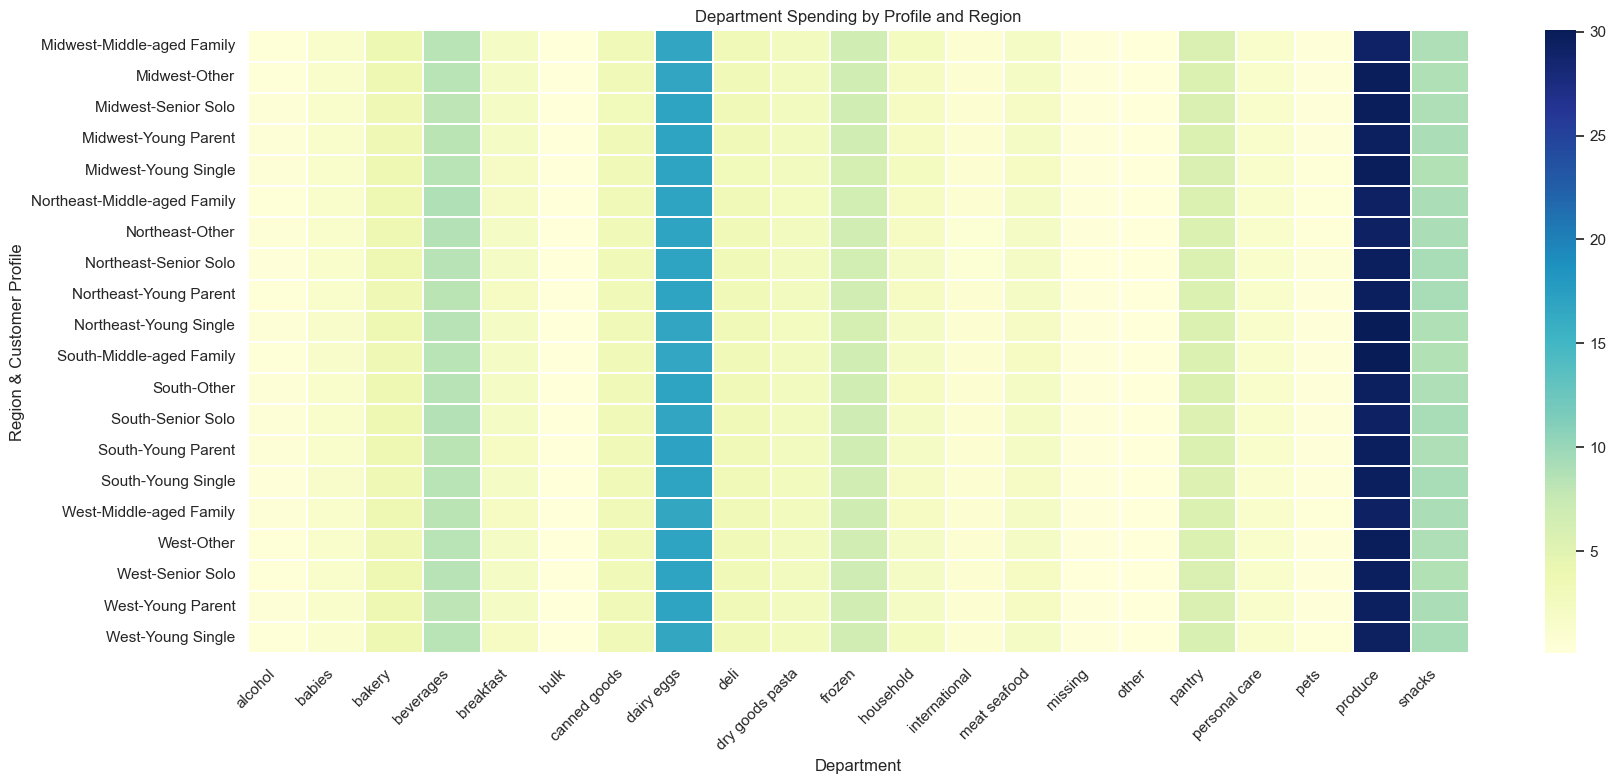

In [57]:
# Assume your DataFrame is called `dept_pivot`
plt.figure(figsize=(18, 8))
sns.heatmap(dept_pivot, cmap='YlGnBu', linewidths=0.2)

plt.title('Department Spending by Profile and Region')
plt.xlabel('Department')
plt.ylabel('Region & Customer Profile')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'department_spending_by_profile_region.png'))
plt.show()

This chart shows which types of customers in each region spend more or less on different types of products.
For example, you might see that Young Parents in the South shop more in babies and deli, while Senior Solos in the West prefer produce and household departments

The analysis reveals clear links between customer profiles, regions, and department preferences. Middle-aged Families and Young Parents are more prominent in the Midwest and South, where they frequently purchase from traditional, family-oriented departments like dairy, pantry, and produce. In contrast, Young Singles and Senior Solos are more common in the West and Northeast, showing stronger preferences for convenience-focused and self-care items such as snacks, beverages, and personal care. While regional differences exist, profile-based shopping behavior remains relatively consistent, making customer profiles a reliable basis for targeted marketing and regional merchandising strategies.

Export your final data set, and save your notebook.

In [61]:
# Export active customers as a .pkl file
df_active.to_pickle(os.path.join(path, '02 DATA', 'Prepared Data', '4.10 active_customers.pkl'))
